
Udemy Course Project + comparison with logistic regression with & without scaling 

# Random Forest Project 

For this project we will be exploring publicly available data from [LendingClub.com](www.lendingclub.com). Lending Club connects people who need money (borrowers) with people who have money (investors). Hopefully, as an investor you would want to invest in people who showed a profile of having a high probability of paying you back. We will try to create a model that will help predict this.

Lending club had a [very interesting year in 2016](https://en.wikipedia.org/wiki/Lending_Club#2016), so let's check out some of their data and keep the context in mind. This data is from before they even went public.

We will use lending data from 2007-2010 and be trying to classify and predict whether or not the borrower paid back their loan in full. You can download the data from [here](https://www.lendingclub.com/info/download-data.action) or just use the csv already provided. It's recommended you use the csv provided as it has been cleaned of NA values.

Here are what the columns represent:
* credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
* purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
* int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
* installment: The monthly installments owed by the borrower if the loan is funded.
* log.annual.inc: The natural log of the self-reported annual income of the borrower.
* dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
* fico: The FICO credit score of the borrower.
* days.with.cr.line: The number of days the borrower has had a credit line.
* revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
* revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
* inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
* delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
* pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

# Import Libraries

**Import the usual libraries for pandas and plotting. You can import sklearn later on.**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Get the Data

** Use pandas to read loan_data.csv as a dataframe called loans.**

In [2]:
df = pd.read_csv('loan_data.csv')

** Check out the info(), head(), and describe() methods on loans.**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [4]:
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


# Exploratory Data Analysis
Data visualization

credit policy comparison based on FICO Score

Text(0.5, 0, 'FICO')

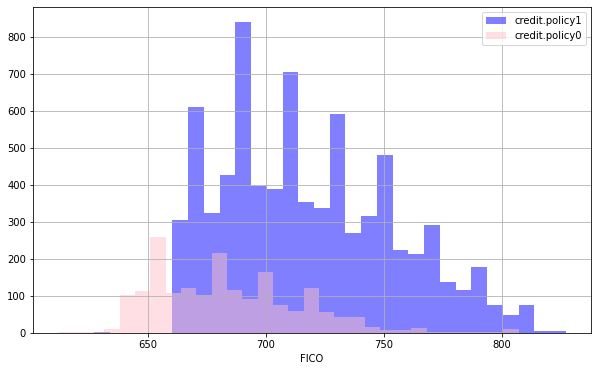

In [5]:
plt.figure(figsize=(10,6))
df[df['credit.policy']==1]['fico'].hist(alpha=0.5,color ='blue', bins = 30, label = 'credit.policy1')
df[df['credit.policy']==0]['fico'].hist(alpha=0.5,color ='pink', bins = 30, label = 'credit.policy0')
plt.legend()
plt.xlabel('FICO')

Whether or not a person fully paid the bill comparison based on FICO score

Text(0.5, 0, 'FICO')

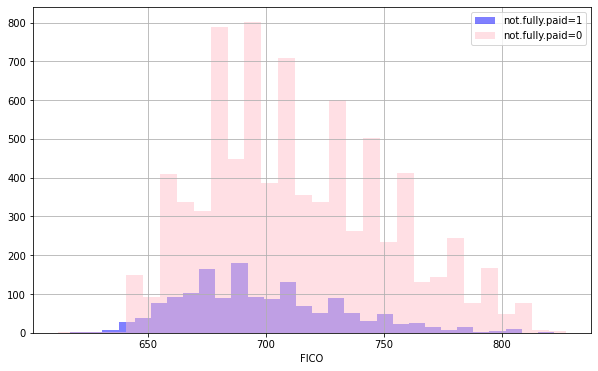

In [6]:
plt.figure(figsize=(10,6))
df[df['not.fully.paid']==1]['fico'].hist(alpha=0.5,color ='blue', bins = 30, label = 'not.fully.paid=1')
df[df['not.fully.paid']==0]['fico'].hist(alpha=0.5,color ='pink', bins = 30, label = 'not.fully.paid=0')
plt.legend()
plt.xlabel('FICO')

Plotting the purpose of the loan based on if a person has been fully paying the bill

<AxesSubplot:xlabel='purpose', ylabel='count'>

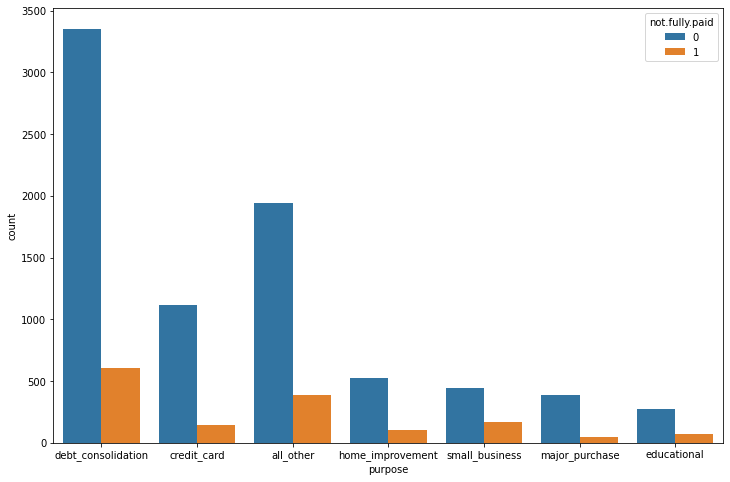

In [7]:
plt.figure(figsize = (12,8))
sns.countplot(x='purpose',hue='not.fully.paid',data = df)

Let's see the trend between FICO score and interest rate.

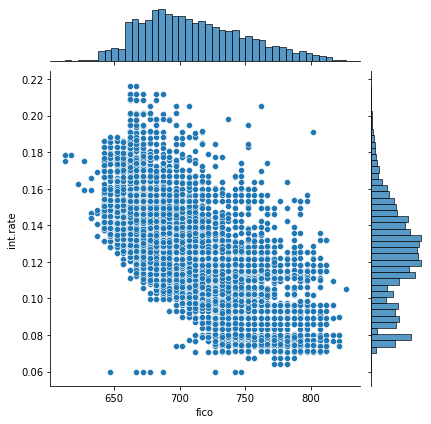

In [8]:
sns.jointplot(x='fico', y ='int.rate',data = df)

lmplot to see the difference between intrest rate difference on fico score, per credit policy and whether it's fully paid

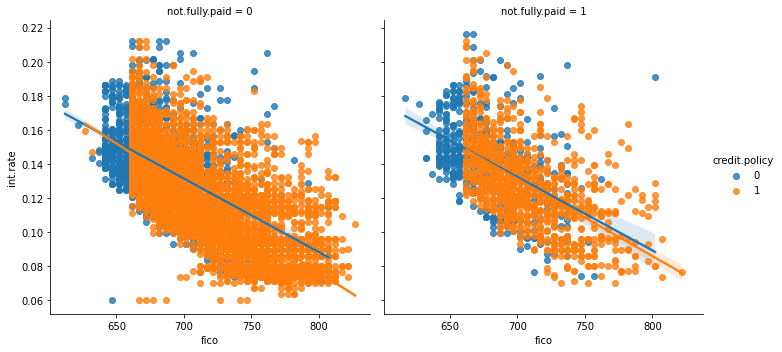

In [9]:
sns.lmplot(x='fico',y='int.rate',data = df,col='not.fully.paid',hue='credit.policy')

# Setting up the Data for Tree & random forest

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


### Categorizing purpose of the loan for prediction

In [11]:
categorization= ['purpose']
final_data = pd.get_dummies(df, columns = categorization, drop_first = True)
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   credit.policy               9578 non-null   int64  
 1   int.rate                    9578 non-null   float64
 2   installment                 9578 non-null   float64
 3   log.annual.inc              9578 non-null   float64
 4   dti                         9578 non-null   float64
 5   fico                        9578 non-null   int64  
 6   days.with.cr.line           9578 non-null   float64
 7   revol.bal                   9578 non-null   int64  
 8   revol.util                  9578 non-null   float64
 9   inq.last.6mths              9578 non-null   int64  
 10  delinq.2yrs                 9578 non-null   int64  
 11  pub.rec                     9578 non-null   int64  
 12  not.fully.paid              9578 non-null   int64  
 13  purpose_credit_card         9578 

Importing modules for train & test

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X = final_data.drop('not.fully.paid', axis = 1 )
y = final_data['not.fully.paid']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

Training and making prediction

In [14]:
from sklearn.tree import DecisionTreeClassifier

In [15]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)
pred = dtree.predict(X_test)

Creating classification report & confusion matrix using test set

In [16]:
from sklearn.metrics import classification_report,confusion_matrix

print(classification_report(y_test,pred))
print(confusion_matrix(y_test,pred))

              precision    recall  f1-score   support

           0       0.85      0.83      0.84      2650
           1       0.21      0.23      0.22       511

    accuracy                           0.73      3161
   macro avg       0.53      0.53      0.53      3161
weighted avg       0.75      0.73      0.74      3161

[[2202  448]
 [ 392  119]]


### Random Forests

In [17]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators = 100)
rfc.fit(X_train,y_train)
rfc_pred = rfc.predict(X_test)

In [18]:
print(classification_report(y_test,rfc_pred))
print(confusion_matrix(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91      2650
           1       0.44      0.02      0.04       511

    accuracy                           0.84      3161
   macro avg       0.64      0.51      0.48      3161
weighted avg       0.78      0.84      0.77      3161

[[2636   14]
 [ 500   11]]


It can be concluded that random forest performed much better than decision tree

In [19]:
from sklearn.linear_model import LogisticRegression

log = LogisticRegression()

In [20]:
final_data.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


Now compare the result with logistic regression

Logistic regression before scaling returns an error, so just use fico score and interest rate

In [21]:
X_log = final_data[['fico','int.rate']]
y_log = final_data['not.fully.paid']

X_train, X_test, y_train, y_test = train_test_split(X_log, y_log, test_size=0.2, random_state=42)

In [22]:
log.fit(X_train,y_train)
prediction_log = log.predict(X_test)
print(classification_report(y_test,prediction_log,zero_division = 0))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91      1611
           1       0.00      0.00      0.00       305

    accuracy                           0.84      1916
   macro avg       0.42      0.50      0.46      1916
weighted avg       0.71      0.84      0.77      1916



In [23]:
print(confusion_matrix(y_test,prediction_log))

[[1611    0]
 [ 305    0]]


Logistic regression using scaler and using all data to predict the model 

In [25]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(final_data.drop('not.fully.paid', axis =1 ))
scaled_features = scaler.transform(final_data.drop('not.fully.paid', axis =1 ))
final_data_feat = pd.DataFrame(data =scaled_features, columns = final_data.drop('not.fully.paid',axis=1).columns)
X = final_data_feat
y = final_data['not.fully.paid']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

log.fit(X_train,y_train)

LogisticRegression()

In [27]:
log_prediction2 = log.predict(X_test)

In [28]:
print(classification_report(y_test,log_prediction2))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91      1611
           1       0.45      0.03      0.06       305

    accuracy                           0.84      1916
   macro avg       0.65      0.51      0.48      1916
weighted avg       0.78      0.84      0.78      1916



In [29]:
print(confusion_matrix(y_test,log_prediction2))

[[1600   11]
 [ 296    9]]


Logistic regression using scaler function has improved the precision by 8% 